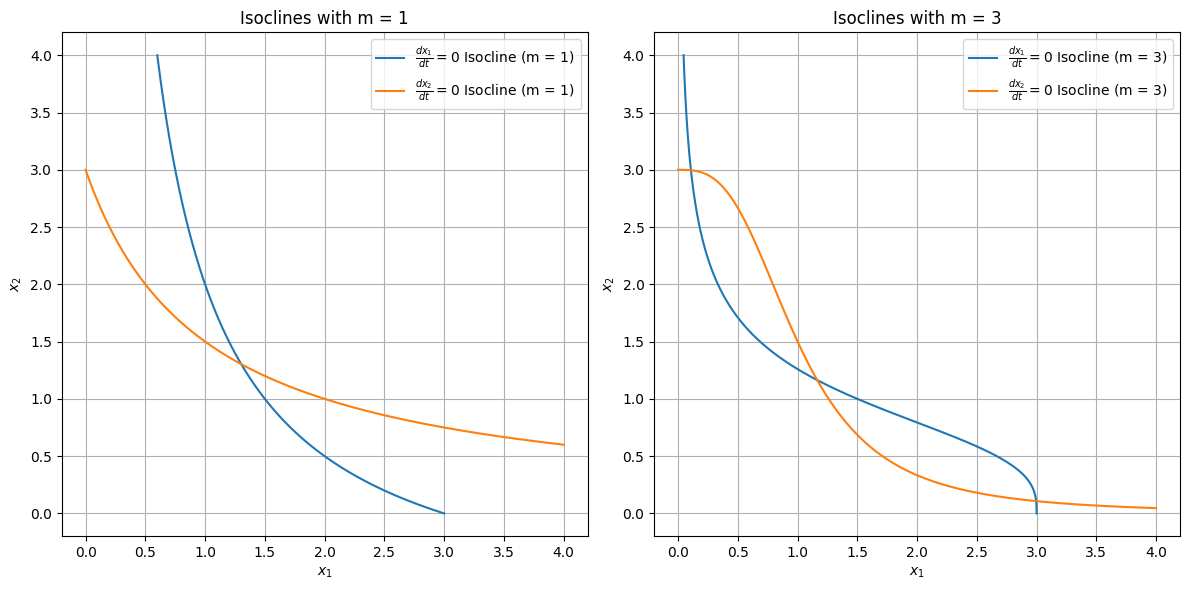

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#####################################
L1 = 3
L2 = 3

m = 1
m_new = 3
##############################

x1_range = np.linspace(0, 4, 400)
x2_range = np.linspace(0, 4, 400)

# For dx1/dt = 0: x1 = L1 / (1 + x2^m)
x1_isocline = L1 / (1 + x2_range ** m)

# For dx2/dt = 0: x2 = L2 / (1 + x1^m)
x2_isocline = L2 / (1 + x1_range ** m)

x1_isocline_new = L1 / (1 + x2_range ** m_new)
x2_isocline_new = L2 / (1 + x1_range ** m_new)

plt.figure(figsize=(12, 6))

# Plotting with m = 1
plt.subplot(1, 2, 1)
plt.plot(x1_isocline, x2_range, label=r'$\frac{dx_1}{dt} = 0$ Isocline (m = 1)')
plt.plot(x1_range, x2_isocline, label=r'$\frac{dx_2}{dt} = 0$ Isocline (m = 1)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Isoclines with m = 1')
plt.legend()
plt.grid(True)

# Second plot with m = 3
plt.subplot(1, 2, 2)
plt.plot(x1_isocline_new, x2_range, label=r'$\frac{dx_1}{dt} = 0$ Isocline (m = 3)')
plt.plot(x1_range, x2_isocline_new, label=r'$\frac{dx_2}{dt} = 0$ Isocline (m = 3)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Isoclines with m = 3')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('figure_1.png')
plt.show()


<Figure size 800x600 with 0 Axes>

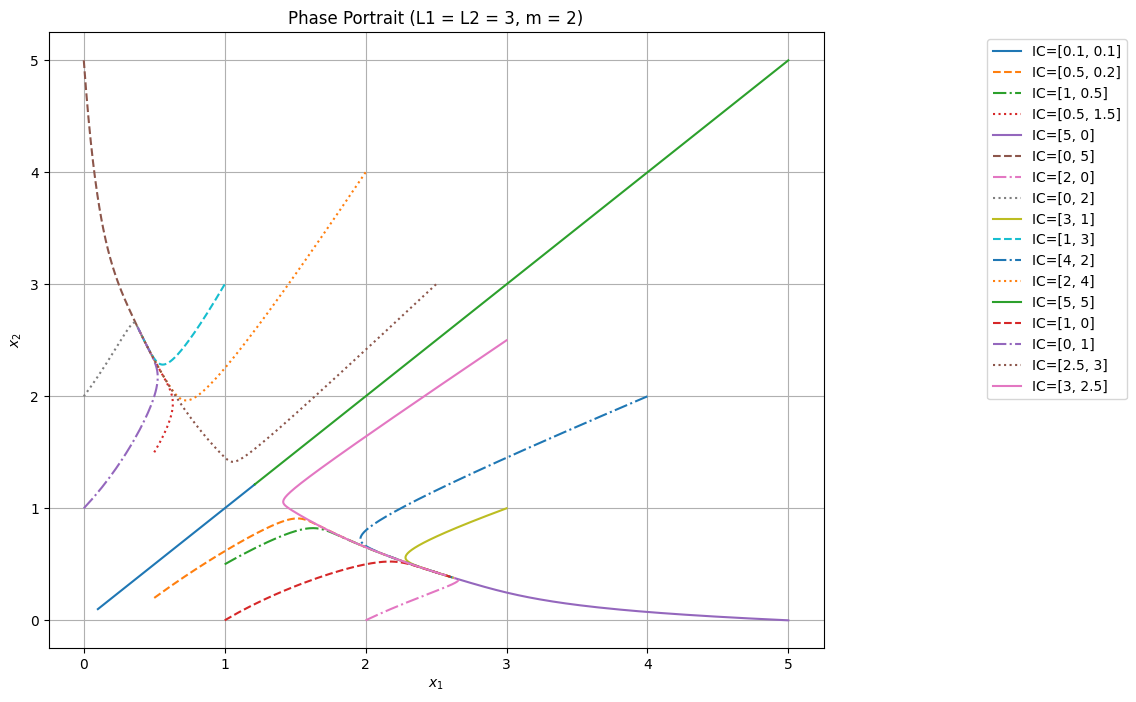

In [10]:
from scipy.integrate import odeint


def func(X, t):
    x1, x2 = X

    dx1_dt = (L1 / (1 + x2 ** m)) - x1
    dx2_dt = (L2 / (1 + x1 ** m)) - x2

    return [dx1_dt, dx2_dt]

t = np.linspace(0, 20, 400)

plt.figure(figsize=(8, 6))

initial_conditions = [
    [0.1, 0.1], [0.5, 0.2], [1, 0.5],
    [0.5, 1.5], [5, 0], [0, 5], [2, 0],
    [0, 2], [3, 1], [1, 3], [4, 2], [2, 4],
    [5, 5], [1, 0], [0, 1], [2.5, 3], [3, 2.5]
]

# Different line styles for better distinction
line_styles = ['-', '--', '-.', ':']

# Plotting the phase portrait
plt.figure(figsize=(10, 8))

for i, X0 in enumerate(initial_conditions):
    X = odeint(func, X0, t)
    plt.plot(X[:, 0], X[:, 1], linestyle=line_styles[i % len(line_styles)], label=f'IC={X0}')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait (L1 = L2 = 3, m = 2)')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.grid()
plt.savefig('figure_2.png')
plt.show()


